In [1]:
pip install mahotas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 36.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


---

# **Code to extract GLCM features:**

In [2]:
import os
import mahotas as mh
from skimage import io, color
import numpy as np
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

def extract_glcm_features(image):
    # Convert to grayscale and scale to 8-bit
    gray_image = color.rgb2gray(image)
    gray_image = (gray_image * 255).astype(np.uint8)
    # Compute Haralick features
    try:
        features = mh.features.haralick(gray_image).mean(0)
    except Exception as e:
        print(f"Error processing image with Mahotas GLCM: {e}")
        features = np.zeros(13)  # Return zero array if there's an error
    return features

def process_image(file_path):
    try:
        image = io.imread(file_path)
        if image.size == 0:
            print(f"Image is empty: {file_path}")
            return None
        glcm_features = extract_glcm_features(image)
        return glcm_features
    except Exception as e:
        print(f"Failed to process image {file_path}: {str(e)}")
        return None

def process_directory(directory_path, image_limit=500):
    data = []
    image_paths = []
    
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                file_path = os.path.join(root, file)
                image_paths.append(file_path)
                if len(image_paths) >= image_limit:
                    break
        if len(image_paths) >= image_limit:
            break
    
    # Process images in parallel
    with ThreadPoolExecutor() as executor:
        futures = {executor.submit(process_image, path): path for path in image_paths}
        for future in as_completed(futures):
            result = future.result()
            if result is not None:
                label = futures[future].split(os.sep)[-3]
                data.append(np.append(result, label))
    
    return data

# Specify the root directory of the dataset
root_directory = '/kaggle/input/dataset-pla/Dataset_PLA'
features_data = process_directory(root_directory)

# Define feature names
feature_names = ['Energy', 'Contrast', 'Correlation', 'Variance', 'Inverse Difference Moment',
                 'Sum Average', 'Sum Variance', 'Sum Entropy', 'Entropy', 'Difference Variance',
                 'Difference Entropy', 'Information Measure of Correlation I', 'Information Measure of Correlation II', 'Label']

# Create DataFrame and save to CSV
df = pd.DataFrame(features_data, columns=feature_names)
df.to_csv('glcm_features_fast.csv', index=False)


In [5]:
import os
import mahotas as mh
from skimage import io, color
import numpy as np
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed

def extract_glcm_features(image):
    """ Extract GLCM features from an image converted to grayscale and scaled to 8-bit. """
    try:
        gray_image = color.rgb2gray(image)
        gray_image = (gray_image * 255).astype(np.uint8)
        features = mh.features.haralick(gray_image).mean(0)
        return features
    except Exception as e:
        print(f"Error processing image with GLCM: {e}")
        return np.zeros(13)  # Return an array of zeros if there's an error

def process_image(file_path):
    """ Load an image and extract features. """
    try:
        image = io.imread(file_path, as_gray=False)
        if image.size == 0:
            raise ValueError("Image is empty.")
        return extract_glcm_features(image)
    except Exception as e:
        print(f"Failed to process image {file_path}: {e}")
        return None

def process_case(case_path):
    """ Process each image in a case folder. """
    features_list = []
    for filename in os.listdir(case_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(case_path, filename)
            features = process_image(image_path)
            if features is not None:
                features_list.append(features)
    return features_list

def process_directory(directory_path):
    """ Walk through the directory and process each image in each case in each class folder. """
    data = []
    labels = []
    for class_folder in os.listdir(directory_path):
        class_path = os.path.join(directory_path, class_folder)
        if os.path.isdir(class_path):
            for case_folder in os.listdir(class_path):
                case_path = os.path.join(class_path, case_folder)
                if os.path.isdir(case_path):
                    print(f"Processing {case_folder} in {class_folder}")
                    # Parallel processing for each case
                    with ThreadPoolExecutor() as executor:
                        futures = [executor.submit(process_image, os.path.join(case_path, f))
                                   for f in os.listdir(case_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
                        for future in as_completed(futures):
                            result = future.result()
                            if result is not None:
                                data.append(result)
                                labels.append(class_folder)

    return data, labels

# Define the path to the dataset
dataset_path = '/kaggle/input/dataset-pla/Dataset_PLA'

# Extract features
features_data, labels = process_directory(dataset_path)

# Define GLCM feature names
glcm_feature_names = ['Energy', 'Contrast', 'Correlation', 'Variance', 'Inverse Difference Moment',
                      'Sum Average', 'Sum Variance', 'Sum Entropy', 'Entropy', 'Difference Variance',
                      'Difference Entropy', 'Information Measure of Correlation I', 'Information Measure of Correlation II']

# Create DataFrame and save to CSV
df = pd.DataFrame(features_data, columns=glcm_feature_names)
df['Label'] = labels
df.to_csv('complete_glcm_features.csv', index=False)

Processing MVP_Test (4) in MVP
Processing MVP_TrainVal (59) in MVP
Processing MVP_TrainVal (109) in MVP
Processing MVP_TrainVal (65) in MVP
Processing MVP_TrainVal (123) in MVP
Processing MVP_TrainVal (104) in MVP
Processing MVP_TrainVal (119) in MVP
Processing MVP_TrainVal (36) in MVP
Processing MVP_Test (8) in MVP
Processing MVP_TrainVal (76) in MVP
Processing MVP_TrainVal (38) in MVP
Processing MVP_TrainVal (30) in MVP
Processing MVP_TrainVal (71) in MVP
Processing MVP_Test (12) in MVP
Processing MVP_TrainVal (90) in MVP
Processing MVP_TrainVal (139) in MVP
Processing MVP_TrainVal (40) in MVP
Processing MVP_TrainVal (3) in MVP
Processing MVP_Test (2) in MVP
Processing MVP_TrainVal (33) in MVP
Processing MVP_TrainVal (6) in MVP
Processing MVP_TrainVal (48) in MVP
Processing MVP_TrainVal (52) in MVP
Processing MVP_TrainVal (26) in MVP
Processing MVP_TrainVal (130) in MVP
Processing MVP_TrainVal (2) in MVP
Processing MVP_TrainVal (10) in MVP
Processing MVP_TrainVal (34) in MVP
Processi

---

# **Code for the Classifier on the extracted features**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [2]:
# Load the features and labels from CSV
df = pd.read_csv('/kaggle/input/glcm-pla/complete_glcm_features_PLA.csv')

# Separate features and labels
X = df.drop('Label', axis=1)
y = df['Label']

In [3]:
# Handle missing values if there are any
X.fillna(X.mean(), inplace=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [8]:
# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 83.93%
Classification Report:
              precision    recall  f1-score   support

         III       0.82      0.94      0.87      6535
          MS       0.85      0.78      0.81      3190
         MVP       0.88      0.67      0.76      1327
          NL       0.87      0.78      0.82      3461

    accuracy                           0.84     14513
   macro avg       0.85      0.79      0.82     14513
weighted avg       0.84      0.84      0.84     14513



In [11]:
# Define GLCM feature names
glcm_feature_names = ['Energy', 'Contrast', 'Correlation', 'Variance', 'Inverse Difference Moment',
                      'Sum Average', 'Sum Variance', 'Sum Entropy', 'Entropy', 'Difference Variance',
                      'Difference Entropy', 'Information Measure of Correlation I', 'Information Measure of Correlation II']


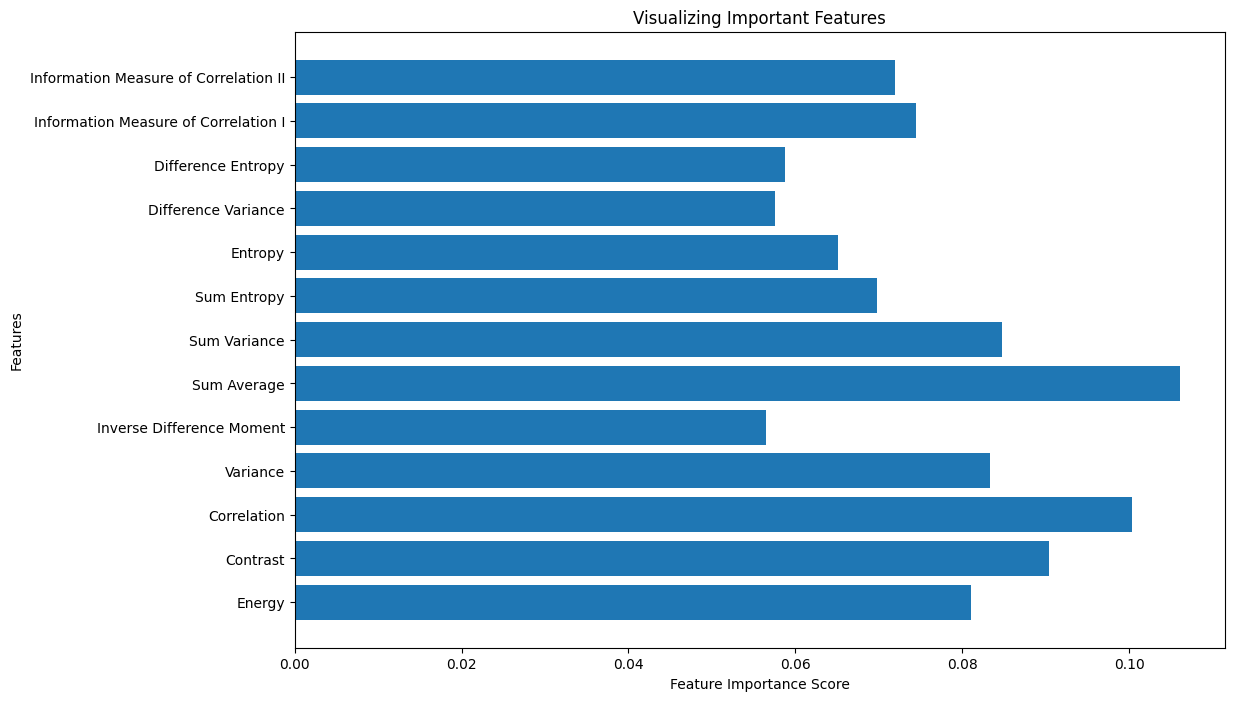

In [16]:
import matplotlib.pyplot as plt

feature_importances = classifier.feature_importances_
# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(glcm_feature_names, feature_importances)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()